In [70]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.lines as mlines

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Figure 1
### Summary of Individual Variability within the Human Subjects

In [61]:
carrabin = pd.read_pickle("data/carrabin_excursions.pkl")
sigma_excursions = pd.read_pickle("data/sigma_excursions.pkl")
jiang = pd.read_pickle("data/switch_vs_conflict.pkl").query("type=='Human'")
jiang_logistic = pd.read_pickle("data/switch_vs_conflict_logistic.pkl").query("type=='Human'")
yoo = pd.read_pickle("data/temporal_weighting.pkl").query("type=='Human'")
yoo_powerlaw = pd.read_pickle("data/temporal_weighting_powerlaw.pkl")

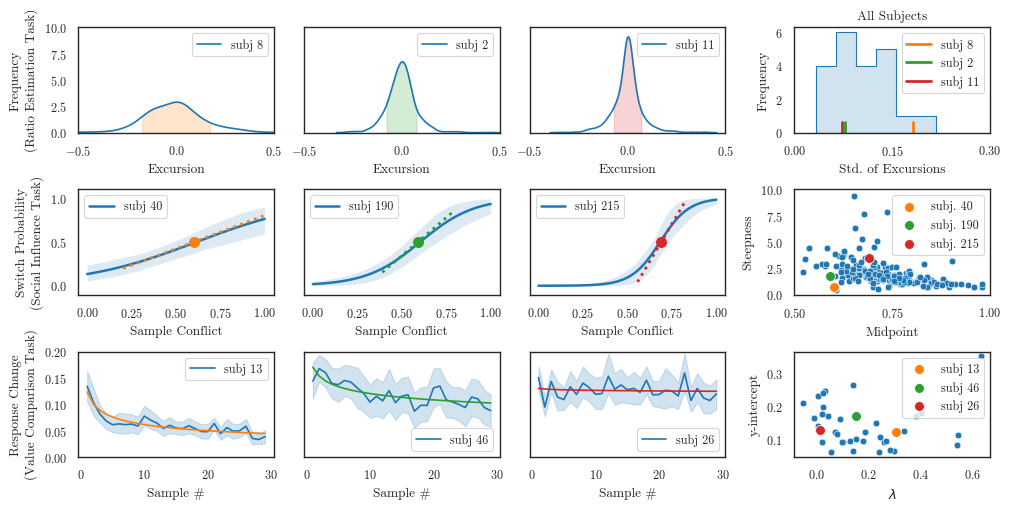

In [62]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,5), sharey=False, constrained_layout=True)

# Carrabin
sids_carrabin = [8, 2, 11]
sid1 = sids_carrabin[0]
sid2 = sids_carrabin[1]
sid3 = sids_carrabin[2]
mean1 = carrabin.query("sid==@sid1")['excursion'].mean()
mean2 = carrabin.query("sid==@sid2")['excursion'].mean()
mean3 = carrabin.query("sid==@sid3")['excursion'].mean()
sigma1 = sigma_excursions.query("sid==@sid1")['sigma'].to_numpy()[0]
sigma2 = sigma_excursions.query("sid==@sid2")['sigma'].to_numpy()[0]
sigma3 = sigma_excursions.query("sid==@sid3")['sigma'].to_numpy()[0]

sns.kdeplot(carrabin.query("sid==@sid1"), x="excursion", color=palette[0], fill=False, common_norm=False, ax=axes[0][0], label=f"subj {sid1}")
sns.kdeplot(carrabin.query("sid==@sid2"), x="excursion", color=palette[0], fill=False, common_norm=False, ax=axes[0][1], label=f"subj {sid2}")
sns.kdeplot(carrabin.query("sid==@sid3"), x="excursion", color=palette[0], fill=False, common_norm=False, ax=axes[0][2], label=f"subj {sid3}")
x1, y1 = axes[0][0].lines[0].get_data()
x2, y2 = axes[0][1].lines[0].get_data()
x3, y3 = axes[0][2].lines[0].get_data()
mask1 = (x1 >= mean1 - sigma1) & (x1 <= mean1 + sigma1)
mask2 = (x2 >= mean2 - sigma2) & (x2 <= mean2 + sigma2)
mask3 = (x3 >= mean3 - sigma3) & (x3 <= mean3 + sigma3)
axes[0][0].fill_between(x1[mask1], y1[mask1], color=palette[1], alpha=0.2)
axes[0][1].fill_between(x2[mask2], y2[mask2], color=palette[2], alpha=0.2)
axes[0][2].fill_between(x3[mask3], y3[mask3], color=palette[3], alpha=0.2)

# axes[0][0].axvline(sigma1, ymin=0, ymax=0.15, color=palette[1], lw=2, ls=':')
# axes[0][1].axvline(sigma2, ymin=0, ymax=0.2, color=palette[2], lw=2, ls=':')
# axes[0][2].axvline(sigma3, ymin=0, ymax=0.2, color=palette[3], lw=2, ls=':')
# axes[0][0].axvline(-sigma1, ymin=0, ymax=0.15, color=palette[1], lw=2, ls=':')
# axes[0][1].axvline(-sigma2, ymin=0, ymax=0.2, color=palette[2], lw=2, ls=':')
# axes[0][2].axvline(-sigma3, ymin=0, ymax=0.2, color=palette[3], lw=2, ls=':')
sns.histplot(sigma_excursions, x="sigma", color=palette[0], ax=axes[0][3], alpha=0.2, element='step')
axes[0][3].axvline(sigma1, ymin=0, ymax=0.1, color=palette[1], lw=2, label=f"subj {sid1}")
axes[0][3].axvline(sigma2, ymin=0, ymax=0.1, color=palette[2], lw=2, label=f"subj {sid2}")
axes[0][3].axvline(sigma3, ymin=0, ymax=0.1, color=palette[3], lw=2, label=f"subj {sid3}")
axes[0][0].set(xlabel="Excursion", xlim=[-0.5, 0.5], xticks=[-0.5, 0, 0.5], ylim=[0, 10], ylabel='Frequency\n(Ratio Estimation Task)')
axes[0][1].set(xlabel="Excursion", xlim=[-0.5, 0.5], xticks=[-0.5, 0, 0.5], ylabel=None)
axes[0][2].set(xlabel="Excursion", xlim=[-0.5, 0.5], xticks=[-0.5, 0, 0.5], ylabel=None)
axes[0][3].set(xlabel="Std. of Excursions", ylabel='Frequency', xlim=[0.0, 0.3], xticks=[0.0, 0.15, 0.3], title=f"All Subjects")
axes[0][0].legend(loc='upper right')
axes[0][1].legend(loc='upper right')
axes[0][2].legend(loc='upper right')
axes[0][3].legend(loc='upper right')
axes[0][1].sharey(axes[0][0])
axes[0][2].sharey(axes[0][0])
axes[0][1].tick_params(labelleft=False)
axes[0][2].tick_params(labelleft=False)
# axes[0][0].set_title("Subject A", color=palette[1])
# axes[0][1].set_title("Subject B", color=palette[2])
# axes[0][2].set_title("Subject C", color=palette[3])

# Jiang
# sids_jiang = [190, 215, 57]
line_span = 0.4  # how far left/right from midpoint to draw the line
sids_jiang = [40, 190, 215]
sid1 = sids_jiang[0]
sid2 = sids_jiang[1]
sid3 = sids_jiang[2]
midpoint1 = jiang_logistic.query("sid==@sid1")['midpoint'].to_numpy()
midpoint2 = jiang_logistic.query("sid==@sid2")['midpoint'].to_numpy()
midpoint3 = jiang_logistic.query("sid==@sid3")['midpoint'].to_numpy()
steepness1 = jiang_logistic.query("sid==@sid1")['tangent'].to_numpy()
steepness2 = jiang_logistic.query("sid==@sid2")['tangent'].to_numpy()
steepness3 = jiang_logistic.query("sid==@sid3")['tangent'].to_numpy()
x_vals1 = np.linspace(midpoint1 - line_span, midpoint1 + line_span, 100)
y_vals1 = steepness1 * (x_vals1 - midpoint1) + 0.5
x_vals2 = np.linspace(midpoint2 - line_span/2, midpoint2 + line_span/2, 100)
y_vals2 = steepness2 * (x_vals2 - midpoint2) + 0.5
x_vals3 = np.linspace(midpoint3 - line_span/3, midpoint3 + line_span/3, 100)
y_vals3 = steepness3 * (x_vals3 - midpoint3) + 0.5

conflict_bins = np.linspace(0, 1.0, 5)
sns.regplot(jiang.query("sid==@sid1"), x='conflict', y='switch', x_bins=conflict_bins, logistic=True, scatter=False, color=palette[0], ax=axes[1][0], label=f"subj {sid1}")
sns.regplot(jiang.query("sid==@sid2"), x='conflict', y='switch', x_bins=conflict_bins, logistic=True, scatter=False, color=palette[0], ax=axes[1][1], label=f"subj {sid2}")
sns.regplot(jiang.query("sid==@sid3"), x='conflict', y='switch', x_bins=conflict_bins, logistic=True, scatter=False, color=palette[0], ax=axes[1][2], label=f"subj {sid3}")
axes[1][0].scatter(midpoint1, 0.5, color=palette[1], s=50, zorder=5)
axes[1][0].plot(x_vals1, y_vals1, color=palette[1], linestyle=':', lw=2, zorder=5)
axes[1][1].scatter(midpoint2, 0.5, color=palette[2], s=50, zorder=5)
axes[1][1].plot(x_vals2, y_vals2, color=palette[2], linestyle=':', lw=2, zorder=5)
axes[1][2].scatter(midpoint3, 0.5, color=palette[3], s=50, zorder=5)
axes[1][2].plot(x_vals3, y_vals3, color=palette[3], linestyle=':', lw=2, zorder=5)

# sns.jointplot(jiang_logistic, x='midpoint', y='steepness', hue='type', ax=axes[1][3])
# sns.scatterplot(jiang_logistic, x='midpoint', y='steepness', color=palette[0], ax=axes[1][3])
sns.scatterplot(x=jiang_logistic['midpoint'], y=jiang_logistic['tangent'], color=palette[0], ax=axes[1][3])
sns.scatterplot(x=midpoint1, y=steepness1, color=palette[1], ax=axes[1][3], label=f"subj. {sid1}", s=50)
sns.scatterplot(x=midpoint2, y=steepness2, color=palette[2], ax=axes[1][3], label=f"subj. {sid2}", s=50)
sns.scatterplot(x=midpoint3, y=steepness3, color=palette[3], ax=axes[1][3], label=f"subj. {sid3}", s=50)
# sns.kdeplot(jiang_logistic, x="midpoint", color=palette[0], cut=0, fill=True, common_norm=False, ax=axes[1][3])
axes[1][0].legend(loc='upper left')
axes[1][1].legend(loc='upper left')
axes[1][2].legend(loc='upper left')
axes[1][0].set(xlabel="Sample Conflict", ylabel='Switch Probability\n(Social Influence Task)', ylim=[-0.1, 1.1])
axes[1][1].set(xlabel="Sample Conflict", ylim=[-0.1, 1.1], ylabel=None)
axes[1][2].set(xlabel="Sample Conflict", ylim=[-0.1, 1.1], ylabel=None)
axes[1][3].set(ylabel="Steepness", xlabel='Midpoint', xlim=[0.5, 1.0], xticks=[0.5, 0.75, 1.0], ylim=[0, 10])
axes[1][1].sharey(axes[1][0])
axes[1][2].sharey(axes[1][0])
axes[1][1].tick_params(labelleft=False)
axes[1][2].tick_params(labelleft=False)

# Yoo
sids_yoo = [13, 46, 26]
sid1 = sids_yoo[0]
sid2 = sids_yoo[1]
sid3 = sids_yoo[2]
lambd1 = yoo_powerlaw.query("sid==@sid1")['lambda'].to_numpy()
lambd2 = yoo_powerlaw.query("sid==@sid2")['lambda'].to_numpy()
lambd3 = yoo_powerlaw.query("sid==@sid3")['lambda'].to_numpy()
intercept1 = yoo_powerlaw.query("sid==@sid1")['slope'].to_numpy()
intercept2 = yoo_powerlaw.query("sid==@sid2")['slope'].to_numpy()
intercept3 = yoo_powerlaw.query("sid==@sid3")['slope'].to_numpy()
def inverse_power(x, intercept, lambd):
    return intercept / x**lambd
xs = yoo['stage'].unique()
y1 = inverse_power(xs, intercept1, lambd1)
y2 = inverse_power(xs, intercept2, lambd2)
y3 = inverse_power(xs, intercept3, lambd3)
sns.lineplot(yoo.query("sid==@sid1"), x='stage', y='deltaR', color=palette[0], ax=axes[2][0], label=f"subj {sid1}")
sns.lineplot(yoo.query("sid==@sid2"), x='stage', y='deltaR', color=palette[0], ax=axes[2][1], label=f"subj {sid2}")
sns.lineplot(yoo.query("sid==@sid3"), x='stage', y='deltaR', color=palette[0], ax=axes[2][2], label=f"subj {sid3}")
axes[2][0].plot(xs, y1, color=palette[1])
axes[2][1].plot(xs, y2, color=palette[2])
axes[2][2].plot(xs, y3, color=palette[3])
sns.scatterplot(x=yoo_powerlaw['lambda'], y=yoo_powerlaw['slope'], color=palette[0], ax=axes[2][3])
sns.scatterplot(x=lambd1, y=intercept1, color=palette[1], ax=axes[2][3], label=f"subj {sid1}", s=50)
sns.scatterplot(x=lambd2, y=intercept2, color=palette[2], ax=axes[2][3], label=f"subj {sid2}", s=50)
sns.scatterplot(x=lambd3, y=intercept3, color=palette[3], ax=axes[2][3], label=f"subj {sid3}", s=50)
axes[2][0].legend(loc='upper right')
axes[2][1].legend(loc='lower right')
axes[2][2].legend(loc='lower right')
axes[2][0].set(ylabel="Response Change\n(Value Comparison Task)", xlabel="Sample #", ylim=[0, 0.2])
axes[2][1].set(ylabel=None, xlabel="Sample #", ylim=[0, 0.2])
axes[2][2].set(ylabel=None, xlabel="Sample #", ylim=[0, 0.2])
axes[2][3].set(ylabel="y-intercept", xlabel=r"$\lambda$")
axes[2][1].sharey(axes[2][0])
axes[2][2].sharey(axes[2][0])
axes[2][1].tick_params(labelleft=False)
axes[2][2].tick_params(labelleft=False)

# plt.tight_layout()
# fig.savefig("figures/figure1.jpg", dpi=600)
fig.savefig("figures/figure1_short.jpg", dpi=600)

# Figure 2
### Model parameters explaining individual variability

In [63]:
carrabin = pd.read_pickle("data/excursion_vs_beta.pkl")
# jiang = pd.read_pickle("data/switch_vs_beta.pkl")
jiang = pd.read_pickle("data/switch_vs_conflict.pkl")
yoo = pd.read_pickle("data/update_vs_lambda.pkl")

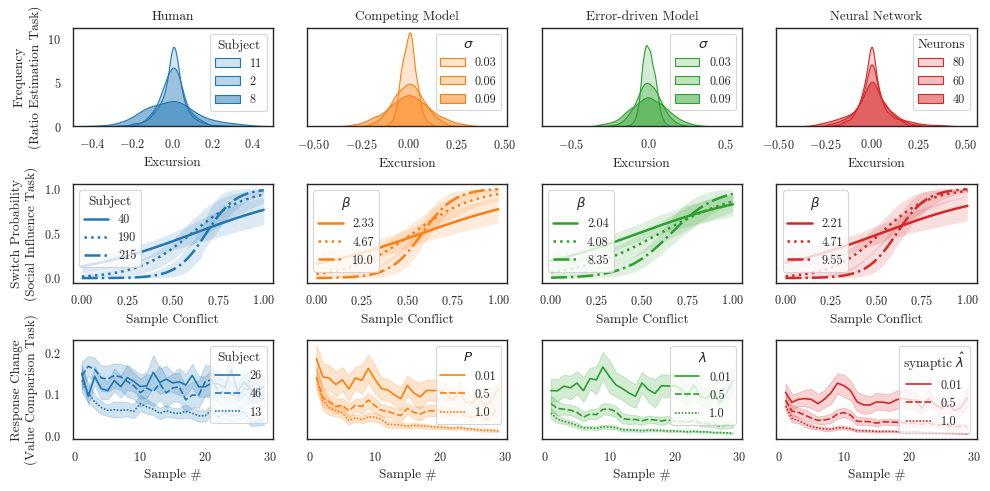

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,5), sharey='row')  # 

alphas = [0.2, 0.3, 0.5]
linestyles = ['-', ':', '-.']
sids_carrabin = [11, 2, 8]
sids_jiang = [40, 190, 215]
sids_yoo = [26, 46, 13]
noises = [0.03, 0.06, 0.09]
sigmas = [0.03, 0.06, 0.09]
neurons = [40, 60, 80]
subject_labels_carrabin = ["A", "B", "C"]
subject_labels_jiang = ["A", "B", "C"]
subject_labels_yoo = ["A", "B", "C"]

for i, subject in enumerate(sids_carrabin):
    sns.kdeplot(carrabin.query("type=='human' & sid==@subject"), x='excursion', ax=axes[0][0], color=palette[0],
                fill=True, common_norm=False, alpha=alphas[i], label=f"{sids_carrabin[i]}")
for i, noise in enumerate(noises):
    sns.kdeplot(carrabin.query("type=='B_n' & noise==@noise"), x='excursion', ax=axes[0][1], color=palette[1],
                fill=True, common_norm=False, alpha=alphas[i], label=f"{noise}")
for i, sigma in enumerate(sigmas):
    sns.kdeplot(carrabin.query("type=='RL_n' & sigma==@sigma"), x='excursion', ax=axes[0][2], color=palette[2],
                fill=True, common_norm=False, alpha=alphas[i], label=f"{sigma}")
for i, n in enumerate(neurons[::-1]):
    sns.kdeplot(carrabin.query("type=='NEF_syn' & neurons==@n"), x='excursion', ax=axes[0][3], color=palette[3],
                fill=True, common_norm=False, alpha=alphas[i], label=f"{n}")
axes[0][0].set(xlabel='Excursion', xlim=[-0.5, 0.5], ylabel='Frequency\n(Ratio Estimation Task)')
axes[0][1].set(xlabel='Excursion', ylabel=None)
axes[0][2].set(xlabel='Excursion', ylabel=None)
axes[0][3].set(xlabel='Excursion', ylabel=None)
axes[0][0].set_title('Human')  #, color=palette[0])
axes[0][1].set_title('Competing Model')  #, color=palette[1])
axes[0][2].set_title('Error-driven Model')  #, color=palette[2])
axes[0][3].set_title('Neural Network')  #, color=palette[3])
axes[0][0].legend(title="Subject")
# axes[0][1].legend(title="Noise")
# axes[0][2].legend(title="Noise")
axes[0][1].legend(title=r"$\sigma$")
axes[0][2].legend(title=r"$\sigma$")
axes[0][3].legend(title="Neurons")


for i, subject in enumerate(sids_jiang):
    sns.regplot(jiang.query("type=='Human' & sid==@subject"), x='conflict', y='switch', scatter=False, logistic=True, color=palette[0],
                line_kws={"linestyle": linestyles[i]}, ax=axes[1][0], label=f"{sids_jiang[i]}")
for n, subject in enumerate(sids_jiang):
    beta = pd.read_pickle("data/DG_z_jiang_mar7_params.pkl").query("sid==@subject")['beta'].unique()[0]
    sns.regplot(jiang.query("type=='DeGroot' & sid==@subject"), x='conflict', y='switch', scatter=False, logistic=True, color=palette[1],
                line_kws={"linestyle": linestyles[n]}, ax=axes[1][1], label=f"{beta:.3}")
for n, subject in enumerate(sids_jiang):
    mt = jiang['type'].unique()[2]
    beta = pd.read_pickle("data/RL_z_jiang_mar7_params.pkl").query("sid==@subject")['beta'].unique()[0]
    sns.regplot(jiang.query("type==@mt & sid==@subject"), x='conflict', y='switch', scatter=False, logistic=True, color=palette[2],
                line_kws={"linestyle": linestyles[n]}, ax=axes[1][2], label=f"{beta:.3}")
for n, subject in enumerate(sids_jiang):
    mt = jiang['type'].unique()[3]
    beta = pd.read_pickle("data/NEF_syn_jiang_apr18_params.pkl").query("sid==@subject")['beta'].unique()[0]
    sns.regplot(jiang.query("type==@mt & sid==@subject"), x='conflict', y='switch', scatter=False, logistic=True, color=palette[3],
                line_kws={"linestyle": linestyles[n]}, ax=axes[1][3], label=f"{beta:.3}")
axes[1][0].set(xlabel='Sample Conflict', ylabel='Switch Probability\n(Social Influence Task)')
axes[1][1].set(xlabel='Sample Conflict', ylabel=None)
axes[1][2].set(xlabel='Sample Conflict', ylabel=None)
axes[1][3].set(xlabel='Sample Conflict', ylabel=None)
axes[1][0].legend(title="Subject")
axes[1][1].legend(title=r"$\beta$")
axes[1][2].legend(title=r"$\beta$")
axes[1][3].legend(title=r"$\beta$")


human = yoo['type'].unique()[0]
adm = yoo['type'].unique()[1]
rl = yoo['type'].unique()[2]
nef = yoo['type'].unique()[3]

sns.lineplot(yoo.query("type==@human"), x='stage', y='deltaR', ax=axes[2][0], color=palette[0], style='sid', style_order=sids_yoo)
sns.lineplot(yoo.query("type==@adm"), x='stage', y='deltaR', ax=axes[2][1], color=palette[1], style='lambd')
sns.lineplot(yoo.query("type==@rl"), x='stage', y='deltaR', ax=axes[2][2], color=palette[2], style='lambd')
sns.lineplot(yoo.query("type==@nef"), x='stage', y='deltaR', ax=axes[2][3], color=palette[3], style='lambd')
axes[2][0].set(xlabel='Sample #', ylabel="Response Change\n(Value Comparison Task)")
axes[2][1].set(xlabel='Sample #')
axes[2][2].set(xlabel='Sample #')
axes[2][3].set(xlabel='Sample #')
axes[2][0].legend(title="Subject", loc='upper right')
# axes[2][0].get_legend().remove()
# legend_elements = [
#     Line2D([0], [0], color=palette[0], linestyle='-', label='A'),
#     Line2D([0], [0], color=palette[0], linestyle='--', label='B'),
#     Line2D([0], [0], color=palette[0], linestyle=':', label='C')
# ]
# axes[2][0].legend(handles=legend_elements, title='Subject')
axes[2][1].legend(title=r"$P$")
axes[2][2].legend(title=r"$\lambda$")
axes[2][3].legend(title=r"synaptic $\hat{\lambda}$")

fig.tight_layout()
# fig.savefig("figures/figure2.jpg", dpi=600)
fig.savefig("figures/figure2_short.jpg", dpi=600)

# Figure 3
### Weight Decay parameters

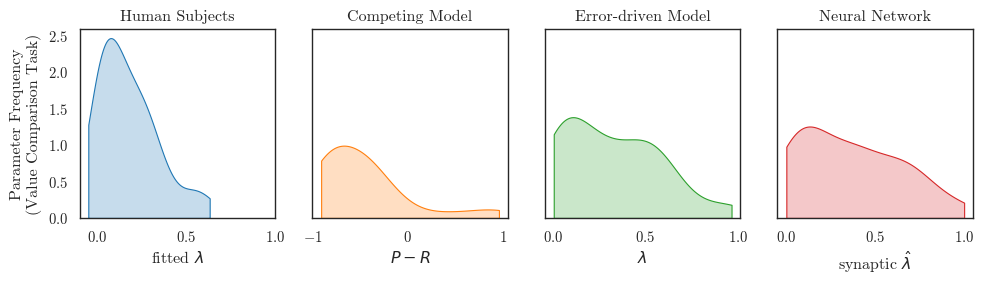

In [52]:
yoo = pd.read_pickle("data/temporal_weighting_powerlaw.pkl")
adm = pd.read_pickle("data/ADM_yoo_apr25_params.pkl")
rl = pd.read_pickle("data/RL_l_yoo_apr25_params.pkl")
nef = pd.read_pickle("data/NEF_syn_yoo_apr16_params.pkl")
primacy_minus_recency = adm['primacy'].to_numpy() - adm['recency'].to_numpy()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3), sharey=True)
sns.kdeplot(yoo, x='lambda', fill=True, common_norm=False, cut=0, ax=axes[0], color=palette[0])
sns.kdeplot(primacy_minus_recency, fill=True, common_norm=False, cut=0, ax=axes[1], color=palette[1])
sns.kdeplot(rl, x='lambda', fill=True, common_norm=False, cut=0, ax=axes[2], color=palette[2])
sns.kdeplot(nef, x='lambda', fill=True, common_norm=False, cut=0, ax=axes[3], color=palette[3])
axes[0].set(xlabel=r"fitted $\lambda$", xlim=[-0.1, 1], title="Human Subjects", ylabel="Parameter Frequency\n(Value Comparison Task)")
axes[1].set(xlabel=r"$P-R$", title="Competing Model")
axes[2].set(xlabel=r"$\lambda$", title="Error-driven Model")
axes[3].set(xlabel=r"synaptic $\hat{\lambda}$", title="Neural Network")
plt.tight_layout()
fig.savefig("figures/figure3.jpg", dpi=600)

# Figure 4
### Neural activity predictions

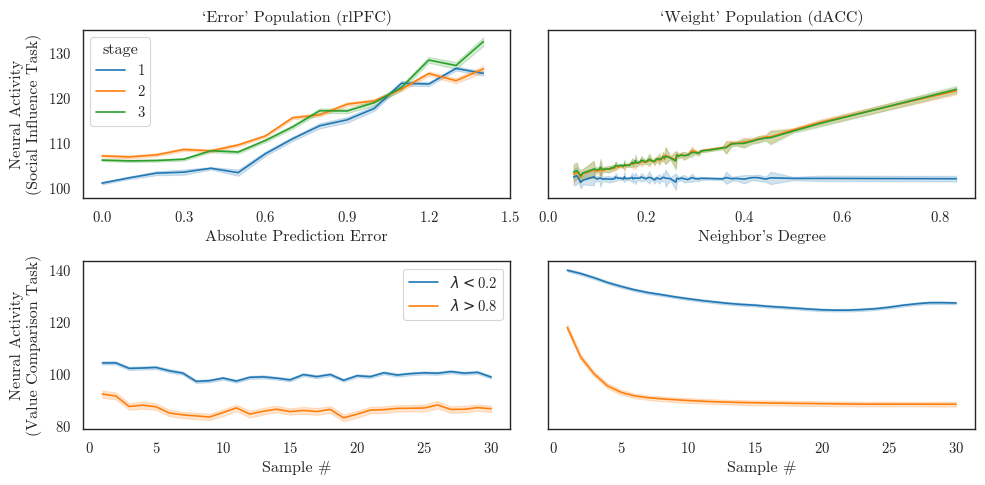

In [48]:
def round_to_nearest(arr):
    return np.round(arr / 0.1) * 0.1
    
activities_jiang = pd.read_pickle("data/NEF_syn_apr7lambda0_activities.pkl")
ape_bin = round_to_nearest(activities_jiang['aPE'].to_numpy())
activities_jiang['aPE_bin'] = ape_bin

activities_yoo = pd.read_pickle("data/yoo_NEF_syn_apr11_activities.pkl")
lambda_small = 0.2
lambda_large = 0.8

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5), sharey='row', sharex=False)
sns.lineplot(activities_jiang.query("stage>0 & population=='error1' & aPE_bin<1.5"), x='aPE_bin', y='activity', hue='stage', ax=axes[0][0], palette=palette[:3])
sns.lineplot(activities_jiang.query("stage>0 & population=='weight'"), x='RD', y='activity', hue='stage', ax=axes[0][1], palette=palette[:3])
sns.lineplot(activities_yoo.query("lambd<@lambda_small & population=='error1'"), x='stage', y='activity', ax=axes[1][0], color=palette[0], label=r"$\lambda<$"+f"{lambda_small}")
sns.lineplot(activities_yoo.query("lambd>@lambda_large & population=='error1'"), x='stage', y='activity', ax=axes[1][0], color=palette[1], label=r"$\lambda>$"+f"{lambda_large}")
sns.lineplot(activities_yoo.query("lambd<@lambda_small & population=='weight'"), x='stage', y='activity', ax=axes[1][1], color=palette[0])
sns.lineplot(activities_yoo.query("lambd>@lambda_large & population=='weight'"), x='stage', y='activity', ax=axes[1][1], color=palette[1])

axes[0][0].set(title="`Error' Population (rlPFC)", ylabel="Neural Activity\n(Social Influence Task)", xlabel="Absolute Prediction Error", xticks=np.arange(0, 1.8, 0.3))
axes[0][1].set(title="`Weight' Population (dACC)", ylabel=None, xticks=np.arange(0, 1.0, 0.2), xlabel="Neighbor's Degree")
axes[0][1].get_legend().remove()

axes[1][0].set(xlabel="Sample #", ylabel='Neural Activity\n(Value Comparison Task)')
axes[1][1].set(xlabel="Sample #")
axes[1][0].legend()


plt.tight_layout()
fig.savefig("figures/figure4.jpg", dpi=600)

# Figure 5
### Synaptic vs Recurrent Predictions

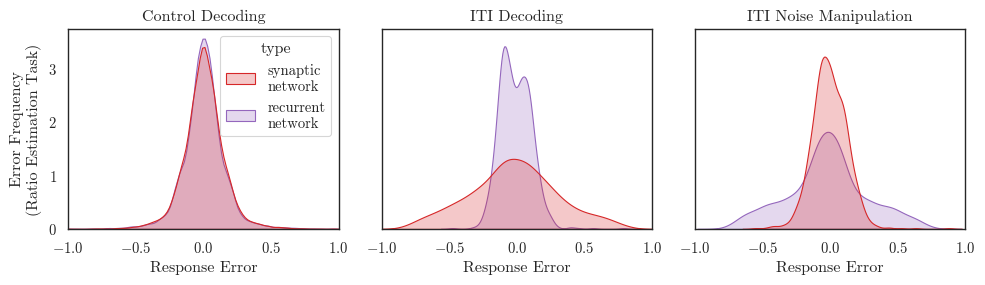

In [42]:
error_data_normal_decode = pd.read_pickle("data/error_normal_decode.pkl")
error_data_iti_decode = pd.read_pickle("data/error_iti_decode.pkl")
error_data_iti_noise = pd.read_pickle("data/error_iti_noise.pkl")
error_data_normal_decode['type'] = error_data_normal_decode['type'].replace("NEF_syn", "synaptic\nnetwork")
error_data_normal_decode['type'] = error_data_normal_decode['type'].replace("NEF_rec", "recurrent\nnetwork")
error_data_iti_decode['type'] = error_data_iti_decode['type'].replace("NEF_syn", "synaptic\nnetwork")
error_data_iti_decode['type'] = error_data_iti_decode['type'].replace("NEF_rec", "recurrent\nnetwork")
error_data_iti_noise['type'] = error_data_iti_noise['type'].replace("NEF_syn", "synaptic\nnetwork")
error_data_iti_noise['type'] = error_data_iti_noise['type'].replace("NEF_rec", "recurrent\nnetwork")
order = ['synaptic\nnetwork', 'recurrent\nnetwork']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3), sharey=True, sharex=True)
sns.kdeplot(error_data_normal_decode, x='error', hue='type', ax=axes[0], fill=True, common_norm=False, palette=palette[3:5], hue_order=order)
sns.kdeplot(error_data_iti_decode, x='error', hue='type', ax=axes[1], fill=True, common_norm=False, palette=palette[3:5], hue_order=order)
sns.kdeplot(error_data_iti_noise, x='error', hue='type', ax=axes[2], fill=True, common_norm=False, palette=palette[3:5], hue_order=order)
axes[0].set(xlabel='Response Error', title='Control Decoding', xlim=[-1,1], ylabel="Error Frequency\n(Ratio Estimation Task)") 
axes[1].set(xlabel='Response Error', title='ITI Decoding') 
axes[2].set(xlabel='Response Error', title='ITI Noise Manipulation')
# axes[0].legend(loc='upper left')
axes[1].get_legend().remove()
axes[2].get_legend().remove()
# axes[1].legend(title="Neural Network Architecture")
plt.tight_layout()
fig.savefig("figures/figure5.jpg", dpi=600)

# Figure S1
### Overall model performance

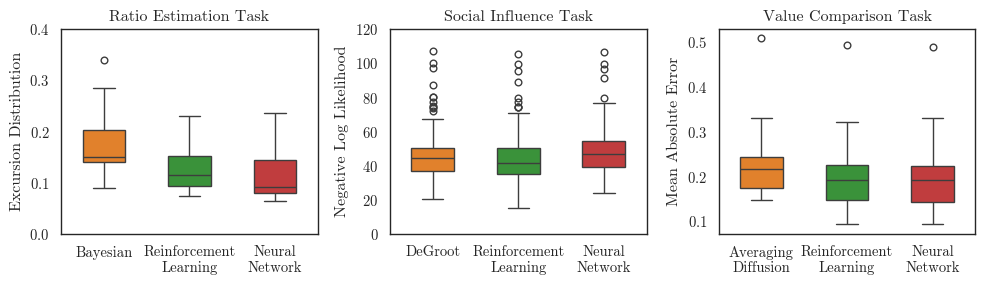

In [71]:
bayesian = pd.read_pickle("data/B_n_carrabin_mar6_performance.pkl")
rl = pd.read_pickle("data/RL_nl_carrabin_mar28_performance.pkl")
nef = pd.read_pickle("data/NEF_syn_carrabin_mar31_performance.pkl")
bayesian['type'] = "Bayesian"
rl['type'] = "Reinforcement\nLearning"
nef['type'] = "Neural\nNetwork"
carrabin = pd.concat([bayesian, rl, nef], ignore_index=True)

degroot = pd.read_pickle("data/DG_z_jiang_mar7_performance.pkl")
rl = pd.read_pickle("data/RL_z_jiang_mar7_performance.pkl")
nef = pd.read_pickle("data/NEF_syn_jiang_apr7lambda0_performance.pkl")
degroot['type'] = "DeGroot"
rl['type'] = "Reinforcement\nLearning"
nef['type'] = "Neural\nNetwork"
jiang = pd.concat([degroot, rl, nef], ignore_index=True)

adm = pd.read_pickle("data/ADM_yoo_apr25_performance.pkl")
rl = pd.read_pickle("data/RL_l_yoo_apr25_performance.pkl")
nef = pd.read_pickle("data/NEF_syn_yoo_apr11_performance.pkl")
adm['type'] = "Averaging\nDiffusion"
rl['type'] = "Reinforcement\nLearning"
nef['type'] = "Neural\nNetwork"
yoo = pd.concat([adm, rl, nef], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
sns.boxplot(carrabin, x='type', y='loss', hue='type', ax=axes[0], palette=palette[1:4], notch=False, width=0.5) # , whis=(0, 100))
sns.boxplot(jiang, x='type', y='loss', hue='type', ax=axes[1], palette=palette[1:4], notch=False, width=0.5) # , whis=(0, 100))
sns.boxplot(yoo, x='type', y='loss', hue='type', ax=axes[2], palette=palette[1:4], notch=False, width=0.5) # , whis=(0, 100))
axes[0].set(xlabel=None, ylabel='Excursion Distribution', ylim=[0, 0.4], title="Ratio Estimation Task") 
axes[1].set(xlabel=None, ylabel='Negative Log Likelihood', ylim=[0, 120], title="Social Influence Task") 
axes[2].set(xlabel=None, ylabel='Mean Absolute Error', title="Value Comparison Task") 
plt.tight_layout()
fig.savefig("figures/figureS1.jpg", dpi=600)

# Figure S2
### Recreation of individual variability with models

In [24]:
carrabin = pd.read_pickle("data/excursions.pkl")
jiang = pd.read_pickle("data/switch_vs_conflict.pkl")
yoo = pd.read_pickle("data/temporal_weighting.pkl")
sids_carrabin = [8, 2, 11]
sids_jiang = [40, 190, 215]
sids_yoo = [13, 46, 26]
carrabin['type'] = carrabin['type'].replace('human', "Human")
carrabin['type'] = carrabin['type'].replace('Bayesian', "Baseline Model")
carrabin['type'] = carrabin['type'].replace('Reinforcement\nLearning', "Reinforcement Learning")
carrabin['type'] = carrabin['type'].replace('Neural\nNetwork', "Neural Network")

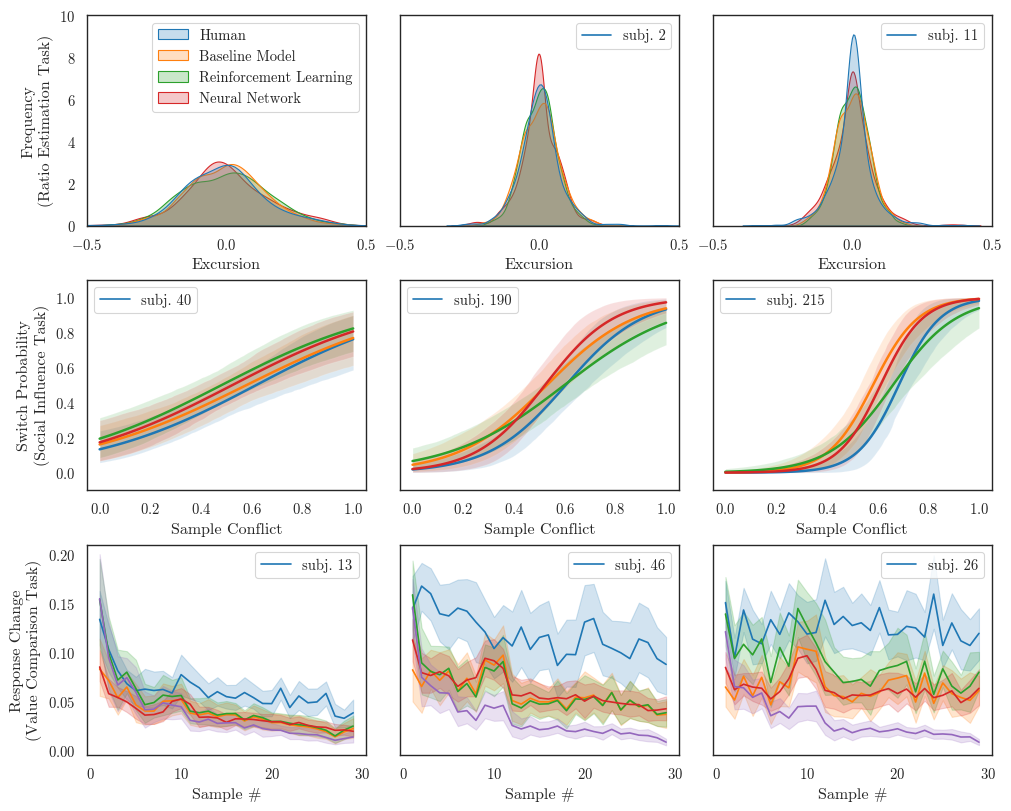

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8), sharey='row', constrained_layout=True)

# Carrabin
sid1 = sids_carrabin[0]
sid2 = sids_carrabin[1]
sid3 = sids_carrabin[2]
sns.kdeplot(carrabin.query("sid==@sid1"), x="excursion", hue='type', palette=palette[:4], fill=True, common_norm=False, ax=axes[0][0])
sns.kdeplot(carrabin.query("sid==@sid2"), x="excursion", hue='type', palette=palette[:4], fill=True, common_norm=False, ax=axes[0][1])
sns.kdeplot(carrabin.query("sid==@sid3"), x="excursion", hue='type', palette=palette[:4], fill=True, common_norm=False, ax=axes[0][2])
axes[0][0].set(xlabel="Excursion", xlim=[-0.5, 0.5], xticks=[-0.5, 0, 0.5], ylim=[0, 10], ylabel='Frequency\n(Ratio Estimation Task)')  # , title=f"Subject {sid1}")
axes[0][1].set(xlabel="Excursion", xlim=[-0.5, 0.5], xticks=[-0.5, 0, 0.5], ylabel=None)
axes[0][2].set(xlabel="Excursion", xlim=[-0.5, 0.5], xticks=[-0.5, 0, 0.5], ylabel=None)
axes[0][1].get_legend().remove()
axes[0][2].get_legend().remove()
legend = axes[0][0].get_legend()
legend.set_title(None)  # Remove the legend title
legend._legend_box.align = "left"  # Fix alignment
blue_line2 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid2}")
blue_line3 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid3}")
axes[0][1].legend(handles=[blue_line2], loc='upper right')
axes[0][2].legend(handles=[blue_line3], loc='upper right')

# Jiang
sid1 = sids_jiang[0]
sid2 = sids_jiang[1]
sid3 = sids_jiang[2]
for mt, model_type in enumerate(jiang['type'].unique()):
    sns.regplot(jiang.query("sid==@sid1 & type==@model_type"), x='conflict', y='switch', scatter=False, logistic=True, color=palette[mt], ax=axes[1][0], label=model_type)
    sns.regplot(jiang.query("sid==@sid2 & type==@model_type"), x='conflict', y='switch', scatter=False, logistic=True, color=palette[mt], ax=axes[1][1], label=model_type)
    sns.regplot(jiang.query("sid==@sid3 & type==@model_type"), x='conflict', y='switch', scatter=False, logistic=True, color=palette[mt], ax=axes[1][2], label=model_type)
axes[1][0].set(xlabel="Sample Conflict", ylabel='Switch Probability\n(Social Influence Task)', ylim=[-0.1, 1.1])
axes[1][1].set(xlabel="Sample Conflict", ylim=[-0.1, 1.1], ylabel=None)
axes[1][2].set(xlabel="Sample Conflict", ylim=[-0.1, 1.1], ylabel=None)
blue_line1 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid1}")
blue_line2 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid2}")
blue_line3 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid3}")
axes[1][0].legend(handles=[blue_line1], loc='upper left')
axes[1][1].legend(handles=[blue_line2], loc='upper left')
axes[1][2].legend(handles=[blue_line3], loc='upper left')

# Yoo
sid1 = sids_yoo[0]
sid2 = sids_yoo[1]
sid3 = sids_yoo[2]
sns.lineplot(yoo.query("sid==@sid1"), x='stage', y='deltaR', hue='type', palette=palette[:5], ax=axes[2][0])
sns.lineplot(yoo.query("sid==@sid2"), x='stage', y='deltaR', hue='type', palette=palette[:5], ax=axes[2][1])
sns.lineplot(yoo.query("sid==@sid3"), x='stage', y='deltaR', hue='type', palette=palette[:5], ax=axes[2][2])
axes[2][0].set(ylabel="Response Change\n(Value Comparison Task)", xlabel="Sample #")
axes[2][1].set(ylabel=None, xlabel="Sample #")
axes[2][2].set(ylabel=None, xlabel="Sample #")
axes[2][0].get_legend().remove()
axes[2][1].get_legend().remove()
axes[2][2].get_legend().remove()
blue_line1 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid1}")
blue_line2 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid2}")
blue_line3 = mlines.Line2D([], [], color=palette[0], label=f"subj. {sid3}")
axes[2][0].legend(handles=[blue_line1], loc='upper right')
axes[2][1].legend(handles=[blue_line2], loc='upper right')
axes[2][2].legend(handles=[blue_line3], loc='upper right')

# plt.tight_layout()
fig.savefig("figures/figureS2.jpg", dpi=600)

# Figure S3
### Synaptic vs Recurrent Performance (group level)

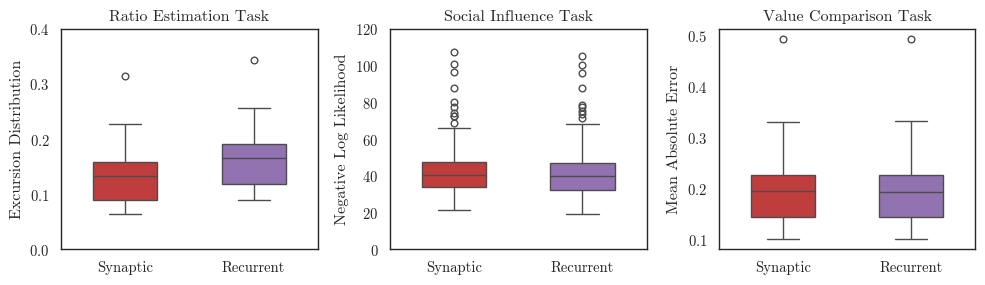

In [74]:
syn = pd.read_pickle("data/NEF_syn_carrabin_apr21_performance.pkl")
rec = pd.read_pickle("data/NEF_rec_carrabin_apr21_performance.pkl")
syn['type'] = "Synaptic"
rec['type'] = "Recurrent"
carrabin = pd.concat([syn, rec], ignore_index=True)
syn = pd.read_pickle("data/NEF_syn_jiang_apr18_performance.pkl")
rec = pd.read_pickle("data/NEF_rec_jiang_apr18_performance.pkl")
syn['type'] = "Synaptic"
rec['type'] = "Recurrent"
jiang = pd.concat([syn], ignore_index=True)
jiang = pd.concat([syn, rec], ignore_index=True)
syn = pd.read_pickle("data/NEF_syn_yoo_apr16_performance.pkl")
rec = pd.read_pickle("data/NEF_rec_yoo_apr16_performance.pkl")
syn['type'] = "Synaptic"
rec['type'] = "Recurrent"
yoo = pd.concat([syn, rec], ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
sns.boxplot(carrabin, x='type', y='loss', hue='type', ax=axes[0], palette=palette[3:5], notch=False, width=0.5) # , whis=(0, 100))
sns.boxplot(jiang, x='type', y='loss', hue='type', ax=axes[1], palette=palette[3:5], notch=False, width=0.5) # , whis=(0, 100))
sns.boxplot(yoo, x='type', y='loss', hue='type', ax=axes[2], palette=palette[3:5], notch=False, width=0.5) # , whis=(0, 100))
axes[0].set(xlabel=None, ylabel='Excursion Distribution', ylim=[0, 0.4], yticks=np.arange(0.0, 0.5, 0.1), title="Ratio Estimation Task") 
axes[1].set(xlabel=None, ylabel='Negative Log Likelihood', ylim=[0, 120], title="Social Influence Task") 
axes[2].set(xlabel=None, ylabel='Mean Absolute Error', yticks=np.arange(0.1, 0.6, 0.1), title="Value Comparison Task") 
plt.tight_layout()
fig.savefig("figures/syn_vs_rec.jpg", dpi=600)